In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Xuất CSV: C:/Users/admin/.vscode/py/crawl/output_clean/
job_final = pd.read_csv('C:/Users/admin/.vscode/py/crawl/output_clean/job_12092025.csv')

job_df_tools = pd.read_csv('C:/Users/admin/.vscode/py/crawl/output_clean/job_tools_12092025.csv')

job_df_benefit = pd.read_csv('C:/Users/admin/.vscode/py/crawl/output_clean/job_df_benefit_12092025.csv')

In [12]:
benefit_patterns = {
    'Bảo hiểm xã hội (BHXH)': r'\bbhxh\b|\bbảo hiểm xã hội\b',
    'Bảo hiểm y tế (BHYT)': r'\bbhyt\b|\bbảo hiểm y tế\b',
    'Bảo hiểm sức khỏe': r'\bbảo hiểm sức khỏe\b|health insurance',
    'Bảo hiểm tai nạn': r'\bbảo hiểm tai nạn\b',
    'Thưởng tháng 13': r'thưởng.*(?:lương)?.*tháng\s*13|\btháng\s*13\b',
    'Thưởng lễ, Tết': r'thưởng.*(?:tết|lễ)',
    'Mức lương / Thu nhập': r'\bmức lương\b|\bthu nhập\b|\bsalary\b',
    'Tăng lương': r'tăng lương|xét tăng lương',
    'Nghỉ phép (12 ngày)': r'\b12\s*ngày\s*phép\b|nghỉ phép|annual leave',
    'Du lịch / Company Trip': r'du lịch|company trip|nghỉ mát',
    'Teambuilding': r'teambuilding|team building',
    'Khám sức khỏe định kỳ': r'khám sức khỏe định kỳ|khám sức khỏe hàng năm',
    'Đào tạo / Khóa học': r'đào tạo|khóa học|training|phát triển cá nhân',
    'Cơ hội phát triển nghề nghiệp': r'cơ hội phát triển|phát triển nghề nghiệp',
    'Môi trường làm việc năng động': r'môi trường.*(?:năng động|trẻ trung|thân thiện|chuyên nghiệp)',
}

patterns = {
    'SQL': r'(?<!no)\bsql\b|mysql|postgresql|postgres|\bt-?sql\b|pl/?sql|sql server',
    'Python': r'\bpython\b',
    'R': r'(?<!\w)r(?!\w)|\br language\b',
    'Excel': r'\bexcel\b',
    'Tableau': r'\btableau\b',
    'PowerBI': r'\bpower\s*bi\b',
    'ETL': r'\betl\b',
    'Airflow': r'\bairflow\b',
    'Spark': r'\bspark\b',
    'AWS': r'\baws\b|amazon web services',
    'Azure': r'\bazure\b',
    'GCP': r'\bgcp\b|google cloud',
    'Snowflake': r'\bsnowflake\b',
}

# VISUALIZE + INSIGHTS

In [4]:
# sns.set_style('whitegrid')
sns.set_style('white')

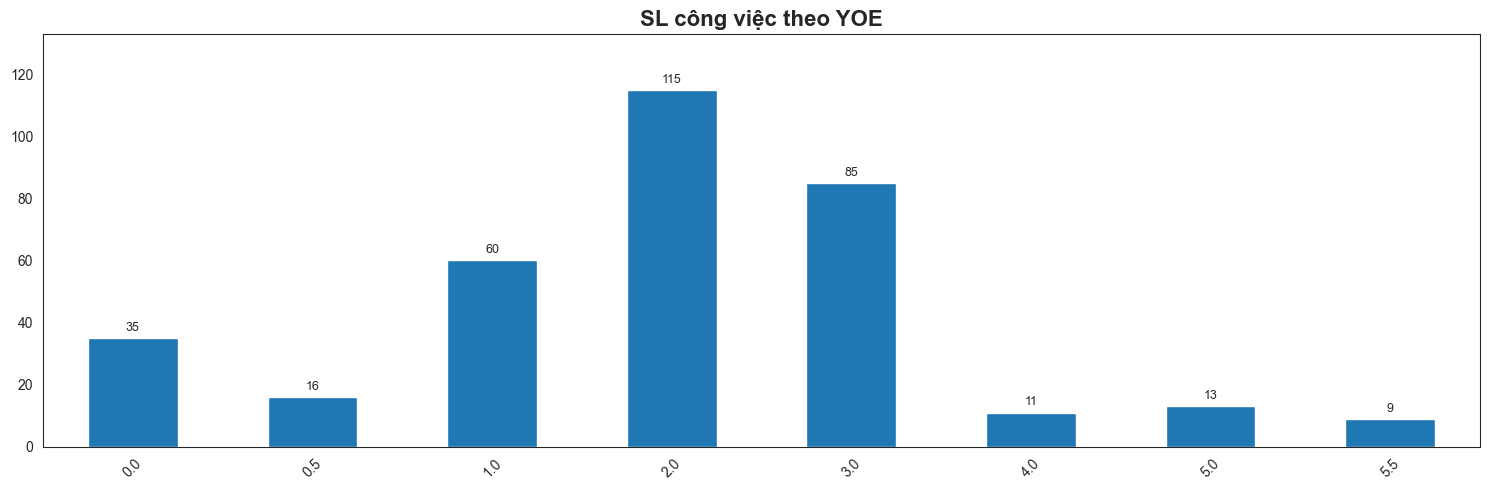

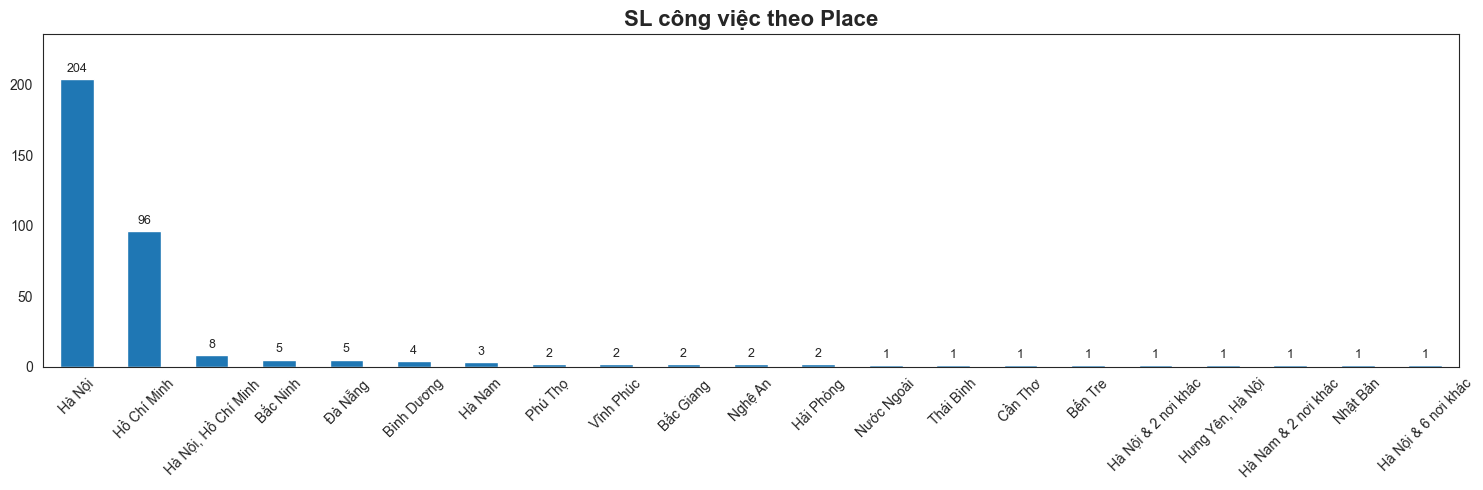

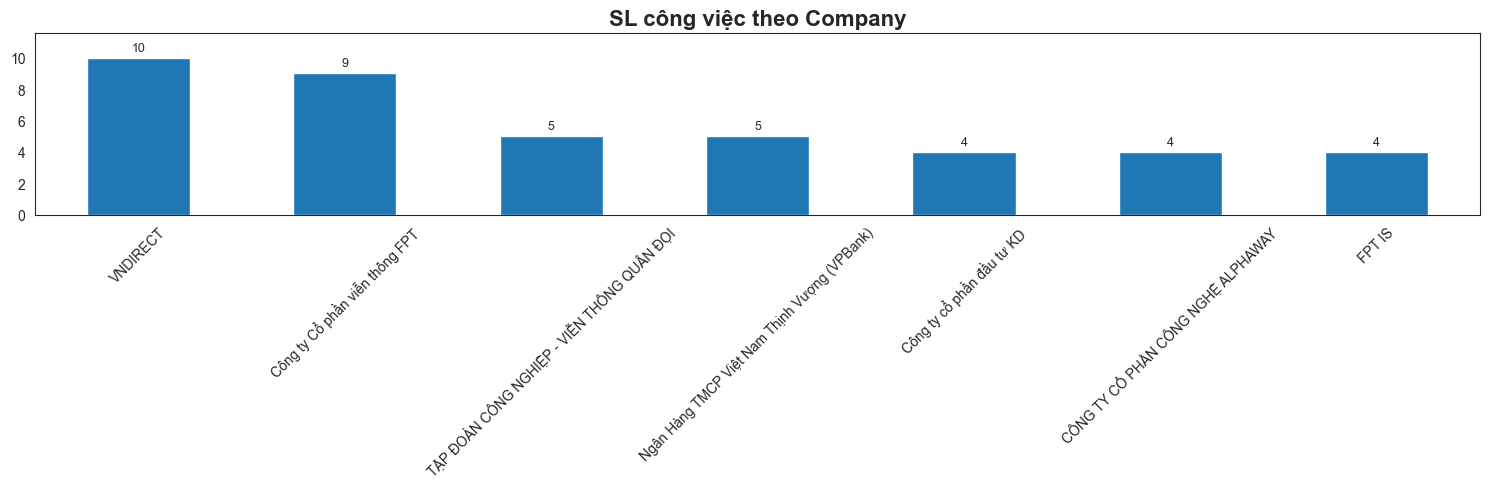

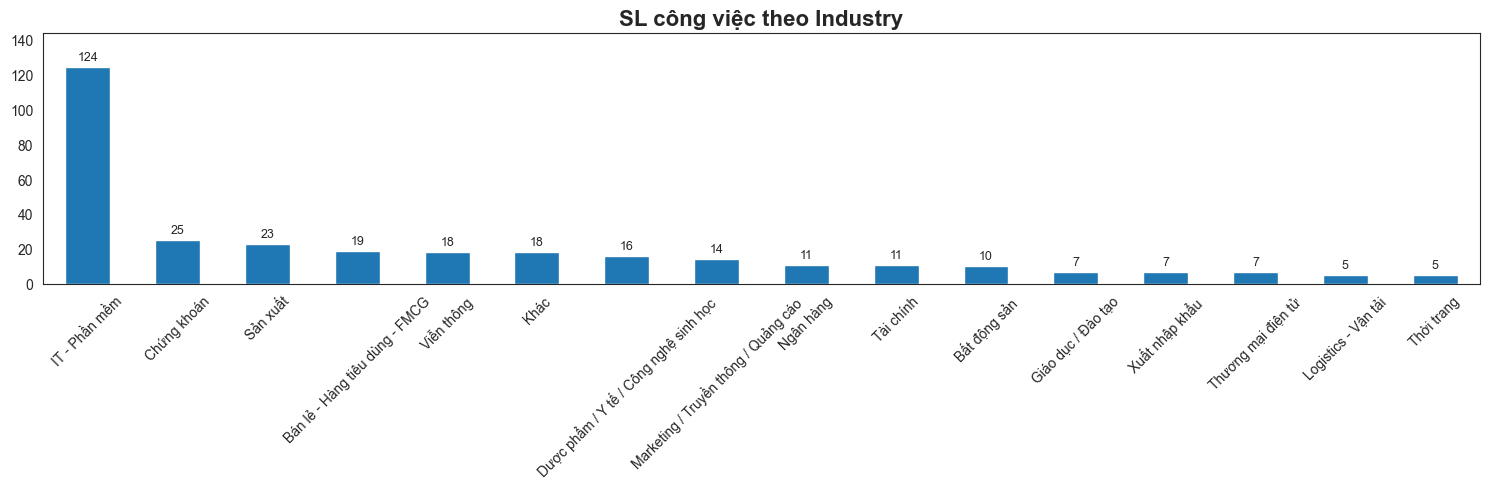

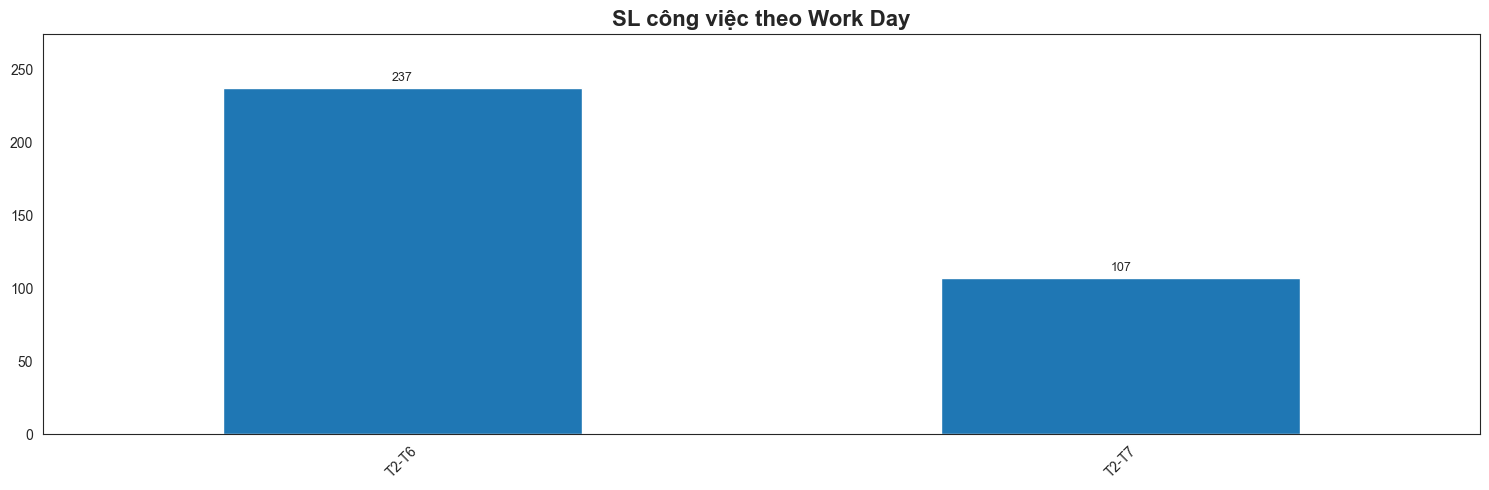

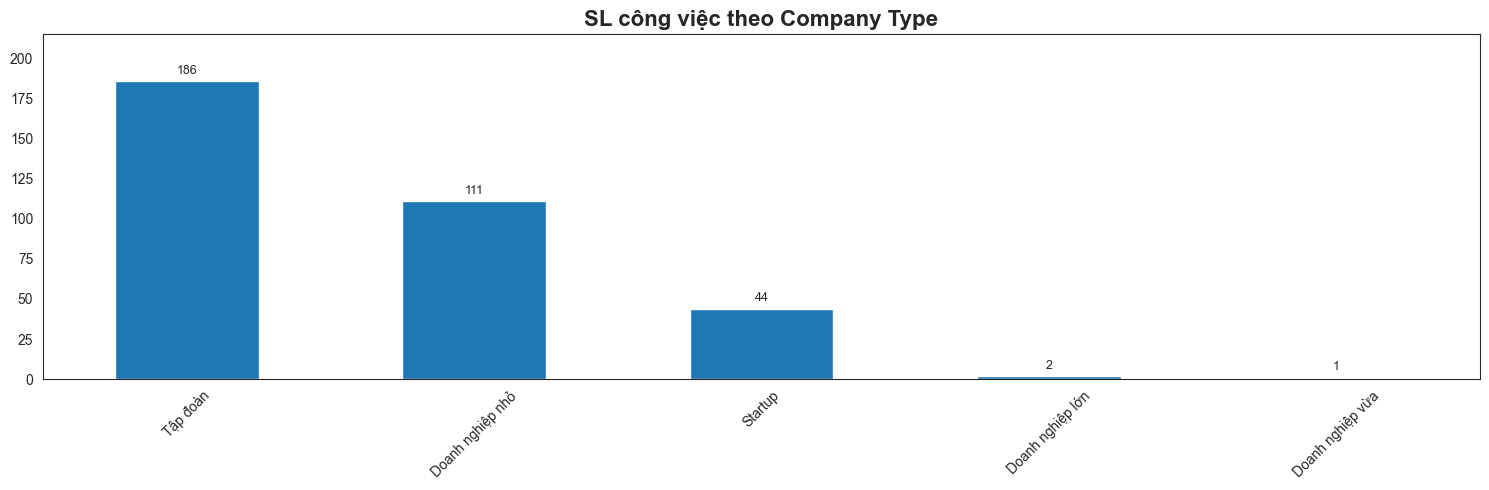

In [7]:
cols = ['YOE', 'Place', 'Company', 'Industry', 'Work Day', 'Company Type']

for column in cols:
    job_amount = job_final[column].value_counts()

    # TH đặc biệt
    if column in ['Company', 'Industry']:   # cột company + industry nhiều values => giới hạn
        data = job_amount[job_amount >= 4]
    else:
        data = job_amount
    if data.empty:                          # giới hạn mà blanks thì bỏ qua
        continue
    if column == 'YOE':                     # với YOE thì sort theo index (YOE)
        data = data.sort_index()

    fig, ax  = plt.subplots(figsize=(15, 5))
    data.plot(kind='bar', x=data.index.astype(str), y=data.values, ax=ax, rot=45)

    title = 'SL công việc theo {}'.format(column)
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel('')

    current_max_ylim = ax.get_ylim()[1]
    ax.set_ylim(0, current_max_ylim * 1.1)

    if not data.empty:
        ax.bar_label(ax.containers[0], fontsize=9, padding=3)

    plt.tight_layout()
    plt.show()

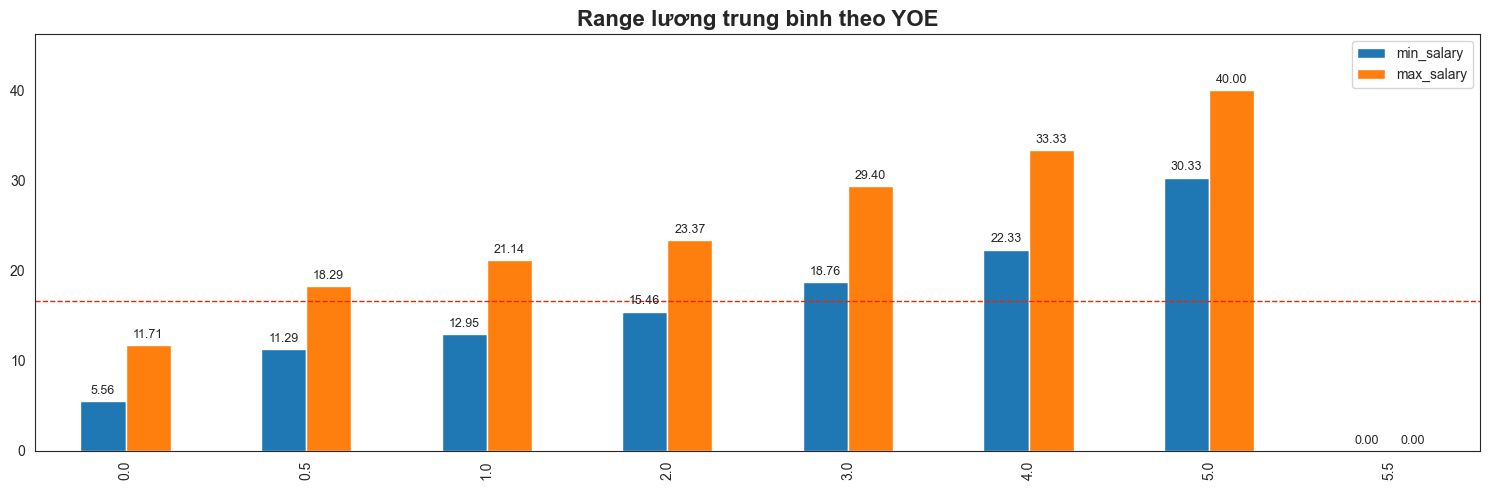

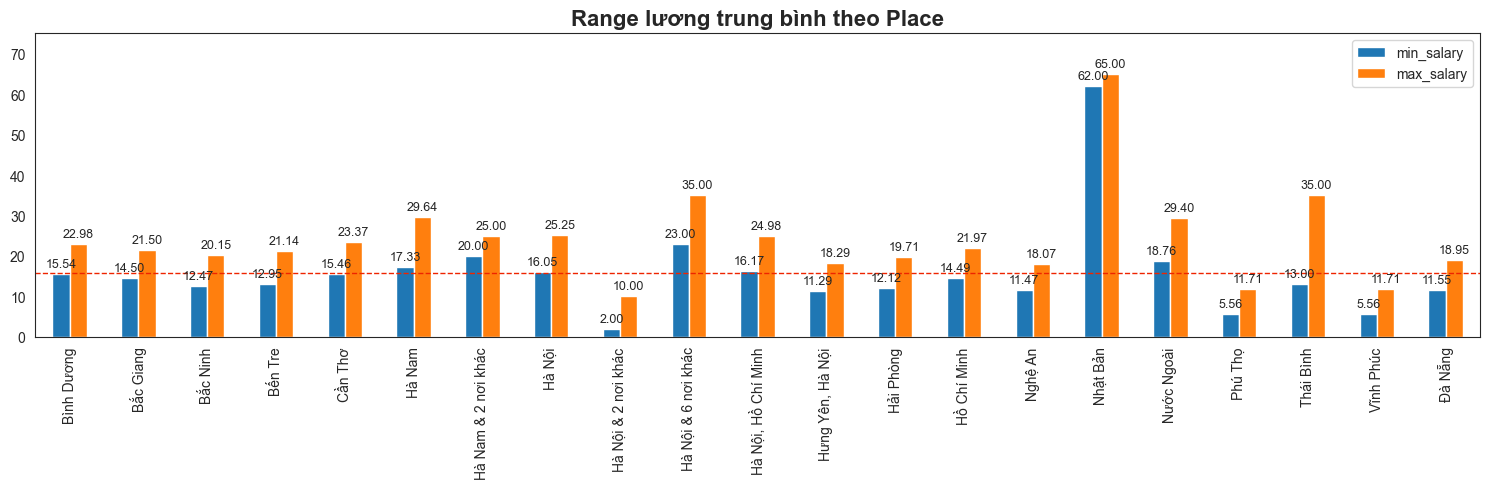

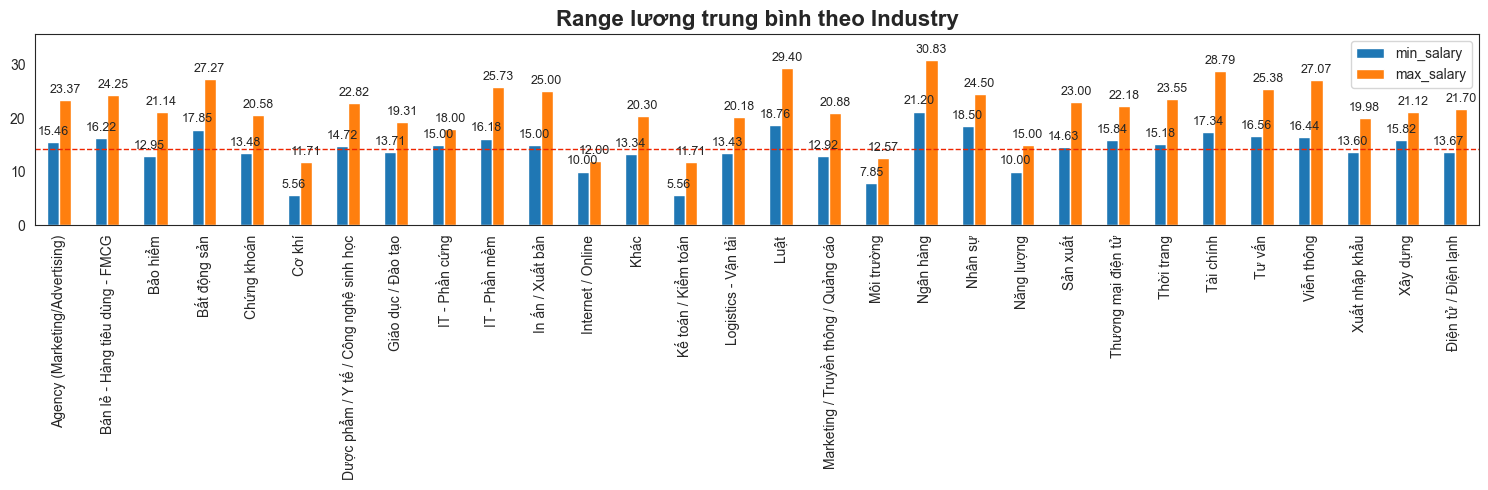

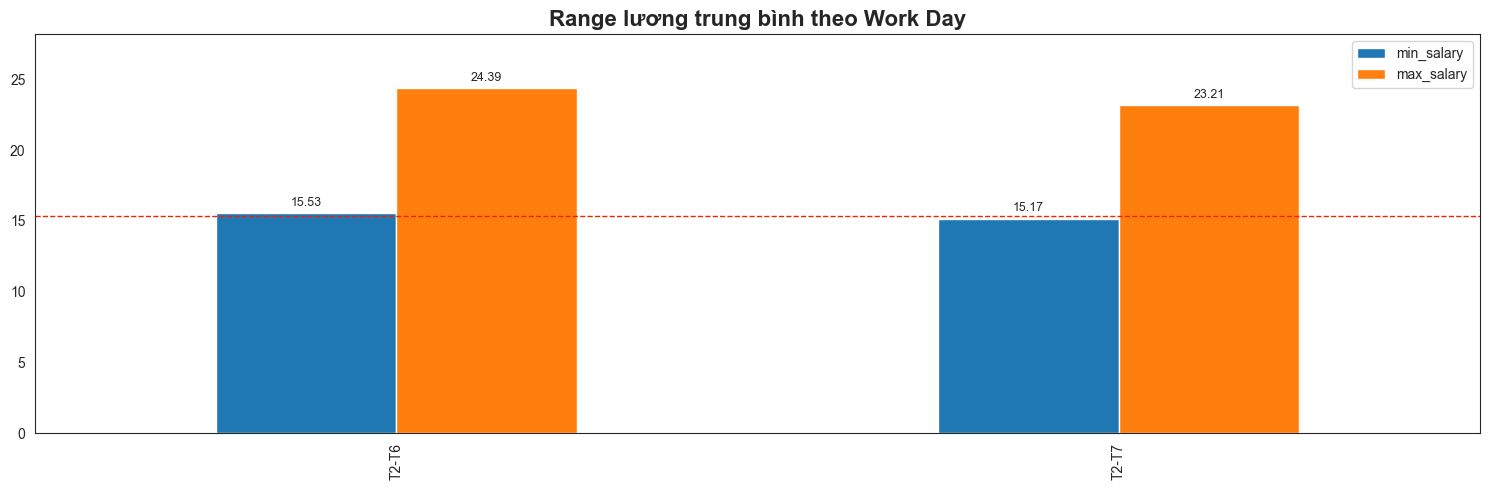

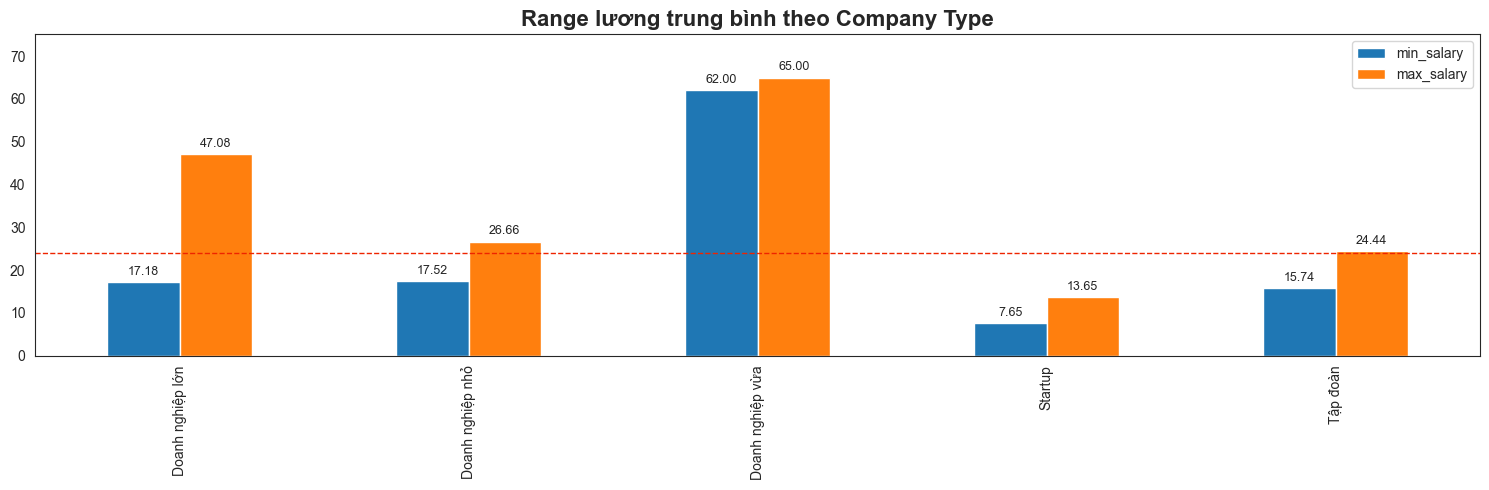

In [8]:
cols = ['YOE', 'Place', 'Industry', 'Work Day', 'Company Type']

for column in cols:
    calc_groupby = job_final.groupby(column).agg(
        min_salary=('Salary MIN', 'mean'),
        max_salary=('Salary MAX', 'mean')
    ).round(2).reset_index()

    overall_avg_max_salary = calc_groupby['min_salary'].mean()

    if column == 'YOE':
        calc_groupby = calc_groupby.sort_values(by=column, ascending=True)


    fig, ax = plt.subplots(figsize=(15, 5))
    calc_groupby.plot(kind='bar', x=column, y=['min_salary', 'max_salary'], stacked=False, ax=ax)

    ax.axhline(y=overall_avg_max_salary, color='#ee2400', linestyle='--', linewidth=1)

    title = 'Range lương trung bình theo {}'.format(column)
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel('')
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', fontsize=9, padding=3)

    current_max_ylim = ax.get_ylim()[1]
    ax.set_ylim(0, current_max_ylim * 1.1)

    plt.tight_layout()
    plt.show()

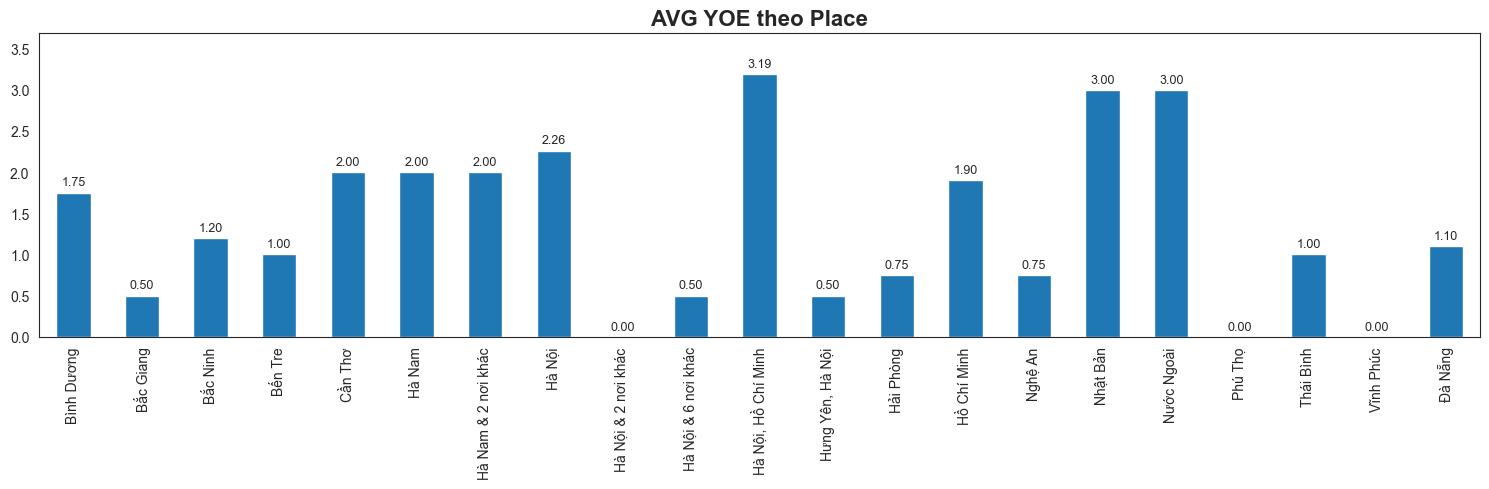

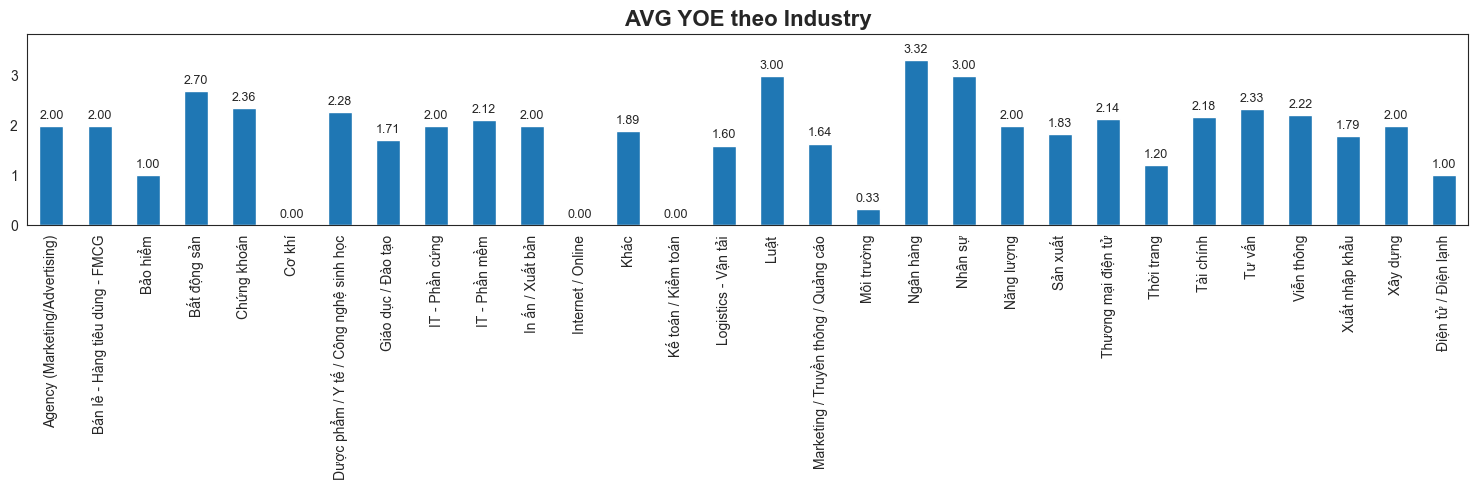

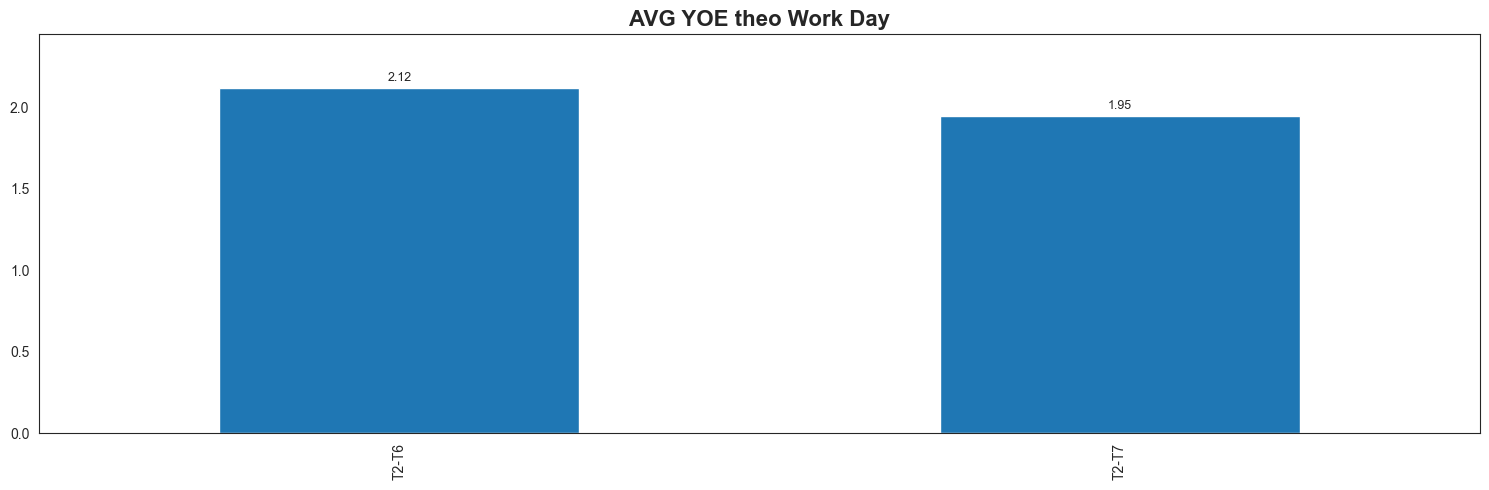

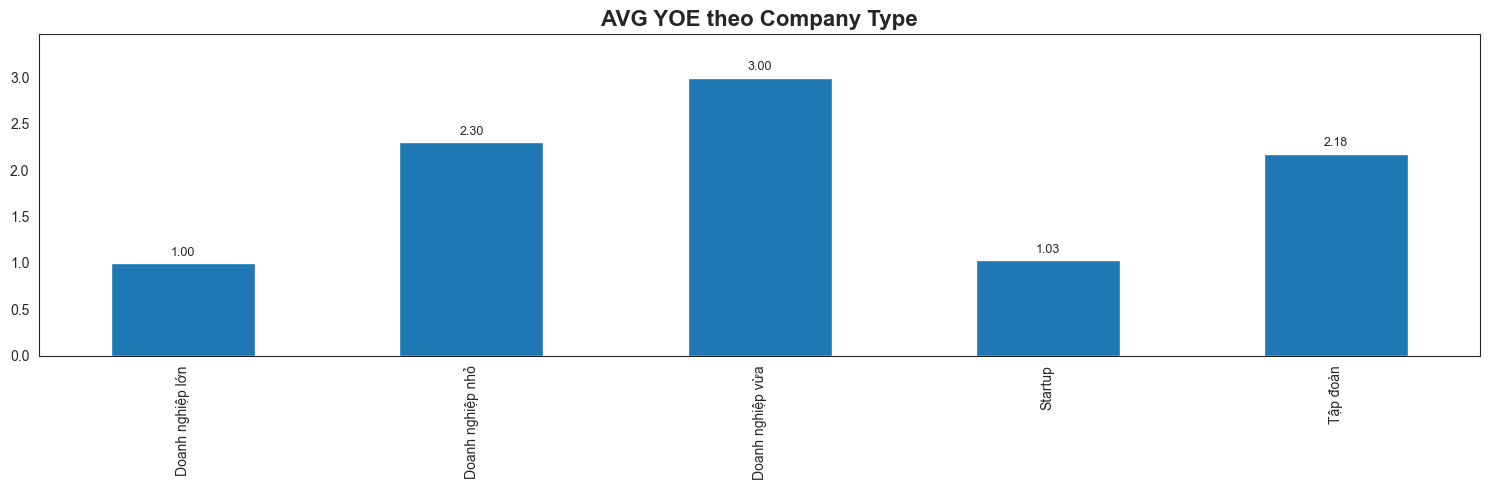

In [9]:
cols = ['Place', 'Industry', 'Work Day', 'Company Type']

for column in cols:
    calc_groupby = job_final.groupby(column).agg(
        avg_yoe=('YOE', 'mean')
    ).round(2).reset_index()

    

    fig, ax = plt.subplots(figsize=(15, 5))
    calc_groupby.plot(kind='bar', x=column, y='avg_yoe', ax=ax, legend=False)

    title = 'AVG YOE theo {}'.format(column)
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel('')
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', fontsize=9, padding=3)

    current_max_ylim = ax.get_ylim()[1]
    ax.set_ylim(0, current_max_ylim * 1.1)

    plt.tight_layout()
    plt.show()

In [13]:
job_final[job_final['Place'].isin(['Nhật Bản', 'Nước Ngoài'])]

,Index,Job Title,YOE,Salary MIN,Salary MAX,Place,Work Day,Company Type,Company,Industry,URL
63,1,Performance Analyst (Internal Control),3.0,18.764359,29.400641,Nước Ngoài,T2-T6,Tập đoàn,CÔNG TY TNHH ĐẦU TƯ TRUYỀN THÔNG GIẢI TRÍ GODI,Marketing / Truyền thông / Quảng cáo,https://www.topcv.vn/viec-lam/performance-anal...
252,25,(JP 166) Kỹ Sư Phân Tích CAE Ô Tô,3.0,62.000000,65.000000,Nhật Bản,T2-T6,Doanh nghiệp vừa,CTY TNHH R TECHNO VIỆT NAM,IT - Phần mềm,https://www.topcv.vn/viec-lam/jp-166-ky-su-pha...


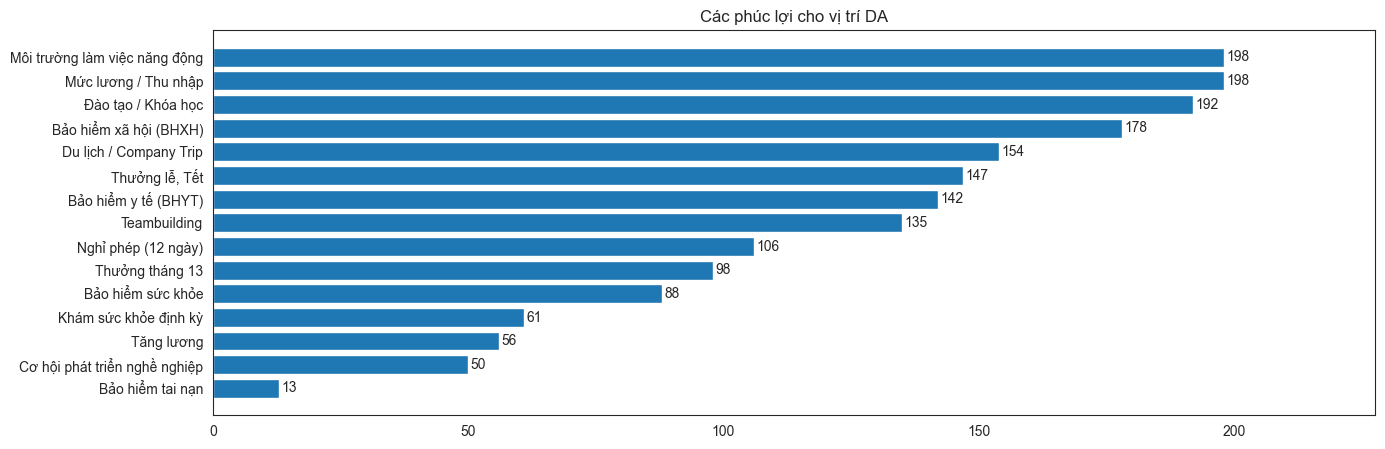

In [14]:
benefit_cols = list(benefit_patterns.keys())
count_benefits = job_df_benefit[benefit_cols].eq('Y').sum().sort_values(ascending=True)

plt.figure(figsize=(15,5))
bars = plt.barh(count_benefits.index,  count_benefits.values)

plt.title('Các phúc lợi cho vị trí DA')
plt.xlim(0, count_benefits.values.max() * 1.15)

for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', ha='left', va='center')


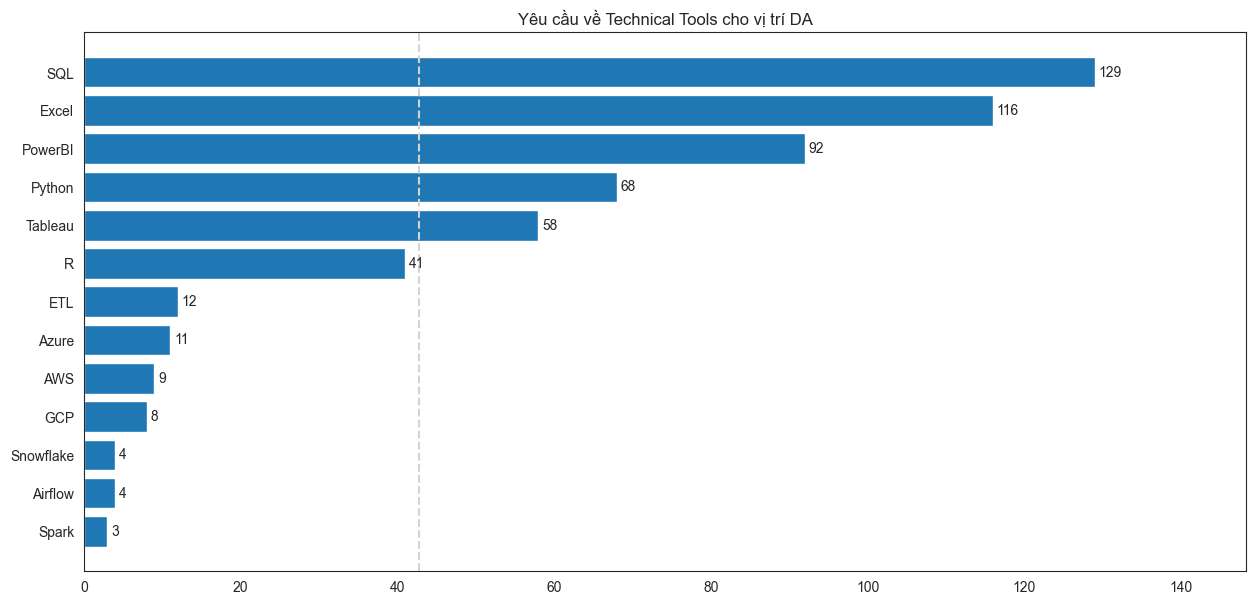

In [15]:
tool_cols = list(patterns.keys())
count_tools = job_df_tools[tool_cols].eq('Y').sum().sort_values(ascending=True)
average_tools = count_tools.mean()

plt.figure(figsize=(15,7))
bars = plt.barh(count_tools.index,  count_tools.values)
plt.axvline(x=average_tools, color='lightgrey', linestyle='--')

plt.title('Yêu cầu về Technical Tools cho vị trí DA')
plt.xlim(0, count_tools.values.max() * 1.15)

for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', ha='left', va='center')